<a href="https://colab.research.google.com/github/sanika2694/ML-/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [6]:
data = datasets.load_wine()

In [ ]:
X= data.data
y=data.target
names = data.target_names
names1 = data.feature_names
print(names)
print(names1)

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
df = pd.DataFrame(X,columns = data.feature_names)
df["Wine class"]=data.target
df["Wine class"] =df["Wine class"].replace(to_replace =[0,1,2],value =['class_0', 'class_1', 'class_2'])

In [ ]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline Wine class  
0                            3.92   1065.0    class_0  
1                            3.40   1050.0    class_0  
2                            3.17   1185.0    class_0  
3                            3.45   1480.0    class_0  
4                            2.93    735.0    class_0  
..                            ...      ...        ...  
173                          1.74    740.0    class_2  
174                          1.56    750.0    class_2  
175                          1.56    835.0    class_2  
176                          1.62    840.0    class_2  
177                          1.60    560.0    class_2  

[178 rows x 14 columns]

In [ ]:
# from sklearn.linear_model import LinearRegression
# mod = LinearRegression()
# mod.fit(X,y)
# mod.predict(X)
# You're using Linear Regression (meant for predicting continuous values) on a classification problem (predicting wine classes 0/1/2).

#  If your target is categories (like class_0, class_1, class_2), you should use LogisticRegression or KNeighborsClassifier, etc.

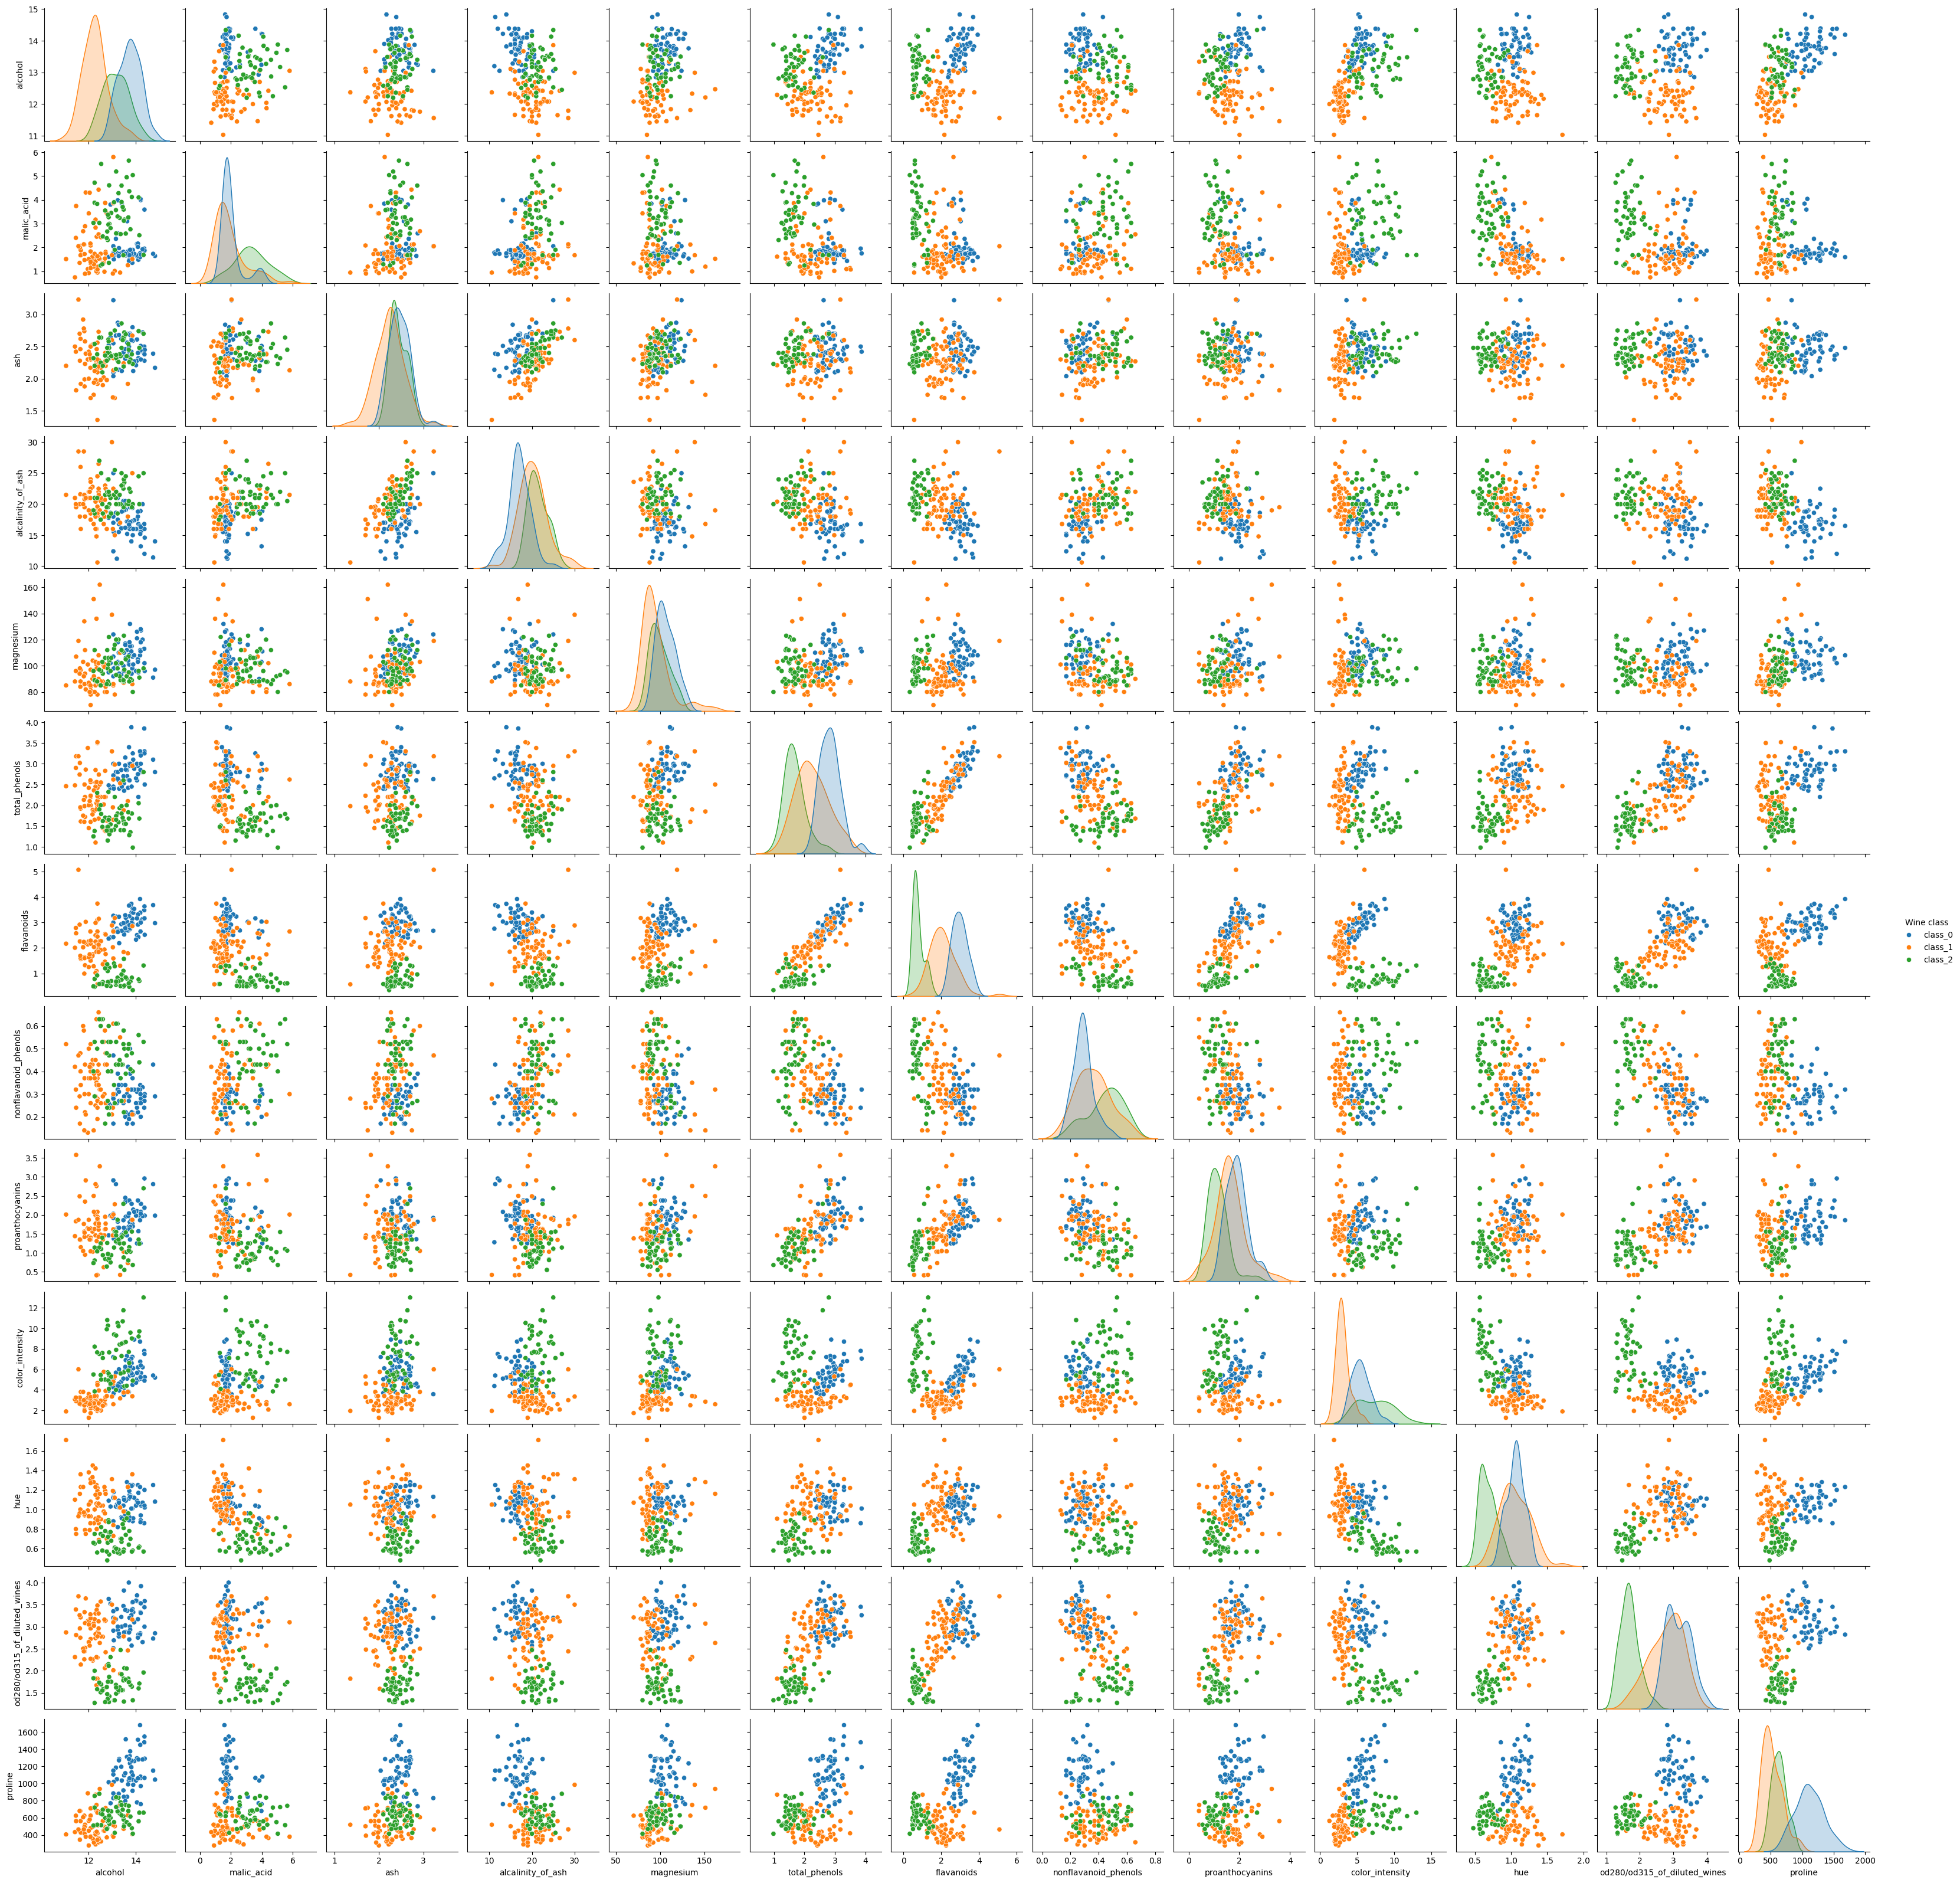

In [ ]:
sns.pairplot(df,hue ="Wine class")

In [ ]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Wine class                      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size =0.3 ,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)


In [ ]:
math.sqrt(len(X_test))

7.3484692283495345

In [ ]:
# X_test.shape  --> (30, 4)   ✅ 30 rows, 4 features
# y_test.shape  --> (30,)     ✅ 30 labels
# म्हणून len(X_test) = 30
# आणि len(y_test) = 30
# त्यामुळे math.sqrt(len(X_test)) = math.sqrt(len(y_test))

In [ ]:
import math
math.sqrt(len(y_test))



7.3484692283495345

In [ ]:
math.sqrt(len(X_train))

11.135528725660043

In [ ]:
math.sqrt(len(y_train))

11.135528725660043

In [ ]:
prd = knn.predict(X_test)


In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,prd)

0.6481481481481481

In [ ]:
# 64.8% accuracy which is less so scale our dataset with standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = sc.fit_transform(X_test)

In [ ]:
prd2 = knn.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,prd2)

0.6481481481481481

In [ ]:
# 10/4/25
# iris


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = sns.load_dataset("iris")

In [ ]:
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [ ]:
X = df.drop("species",axis =1)
y = df["species"]

In [ ]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [ ]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
kn = KNeighborsClassifier(n_neighbors= 2,metric="euclidean")
kn.fit(X,y)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [ ]:
kn.score(X,y)

0.98

In [ ]:
kn.predict(X)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [ ]:
# svc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
svc= SVC()
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2 ,random_state=30)
model = SVC()
model.fit(X_train,y_train)
prd = model.predict(X_test)
acc= model.score(X_train,y_train)
acc2 = model.score(X_test,y_test)
acc

0.9583333333333334

In [ ]:
acc2

1.0

In [ ]:
y_train

139     virginica
81     versicolor
112     virginica
127     virginica
118     virginica
          ...    
53     versicolor
130     virginica
140     virginica
45         setosa
37         setosa
Name: species, Length: 120, dtype: object

In [ ]:
X_train

sepal_length  sepal_width  petal_length  petal_width
139           6.9          3.1           5.4          2.1
81            5.5          2.4           3.7          1.0
112           6.8          3.0           5.5          2.1
127           6.1          3.0           4.9          1.8
118           7.7          2.6           6.9          2.3
..            ...          ...           ...          ...
53            5.5          2.3           4.0          1.3
130           7.4          2.8           6.1          1.9
140           6.7          3.1           5.6          2.4
45            4.8          3.0           1.4          0.3
37            4.9          3.6           1.4          0.1

[120 rows x 4 columns]

In [ ]:
# naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
%%time
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
kn.score(X_test,y_test),kn.score(X_train,y_train)

CPU times: user 26.7 ms, sys: 0 ns, total: 26.7 ms
Wall time: 60.4 ms


(0.9333333333333333, 0.9833333333333333)

In [ ]:
%%time
model = SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test),model.score(X_train,y_train)

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 12.6 ms


(1.0, 0.9583333333333334)

In [ ]:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test),model.score(X_train,y_train)

(0.9333333333333333, 0.9666666666666667)

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]